In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("soapshipment.csv")
df

In [4]:
numerical_cols = ['MRP per unit','Gross Weight in Tons','Net Wgt in Tons','Billing Quantity - EA','Qty In Cases','Total Invoice value']

In [13]:
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

table_data = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

table_data

,Skewness,Kurtosis
MRP per unit,0.686011,7.271725
Gross Weight in Tons,8.655386,142.057463
Net Wgt in Tons,8.770491,145.855726
Billing Quantity - EA,6.910359,87.919532
Qty In Cases,8.281982,130.267630
Total Invoice value,9.495464,169.092244


In [15]:
df[numerical_cols].describe()

,MRP per unit,Gross Weight in Tons,Net Wgt in Tons,Billing Quantity - EA,Qty In Cases,Total Invoice value
count,46044.000000,46044.000000,46044.000000,46044.000000,46044.000000,4.604400e+04
mean,33.465002,0.083060,0.078231,1078.332942,5.695596,2.235166e+04
std,21.413710,0.126794,0.120239,1689.048239,8.650918,3.585069e+04
min,-58.000000,-0.090000,0.000000,-864.000000,0.000000,-2.595648e+04
25%,10.000000,0.017000,0.016000,288.000000,1.000000,5.937750e+03
50%,34.000000,0.050000,0.047000,576.000000,3.000000,1.272377e+04
75%,58.000000,0.097000,0.087000,1440.000000,7.000000,2.554244e+04
max,462.000000,4.654000,4.450000,44496.000000,309.000000,1.376075e+06


In [20]:
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,MRP per unit,Gross Weight in Tons,Net Wgt in Tons,Billing Quantity - EA,Qty In Cases,Total Invoice value
MRP per unit,1.000000,-0.088643,-0.079804,-0.307915,-0.131670,0.008820
Gross Weight in Tons,-0.088643,1.000000,0.999669,0.876390,0.995982,0.981639
Net Wgt in Tons,-0.079804,0.999669,1.000000,0.866442,0.994434,0.985439
Billing Quantity - EA,-0.307915,0.876390,0.866442,1.000000,0.913335,0.773176
Qty In Cases,-0.131670,0.995982,0.994434,0.913335,1.000000,0.963483
Total Invoice value,0.008820,0.981639,0.985439,0.773176,0.963483,1.000000


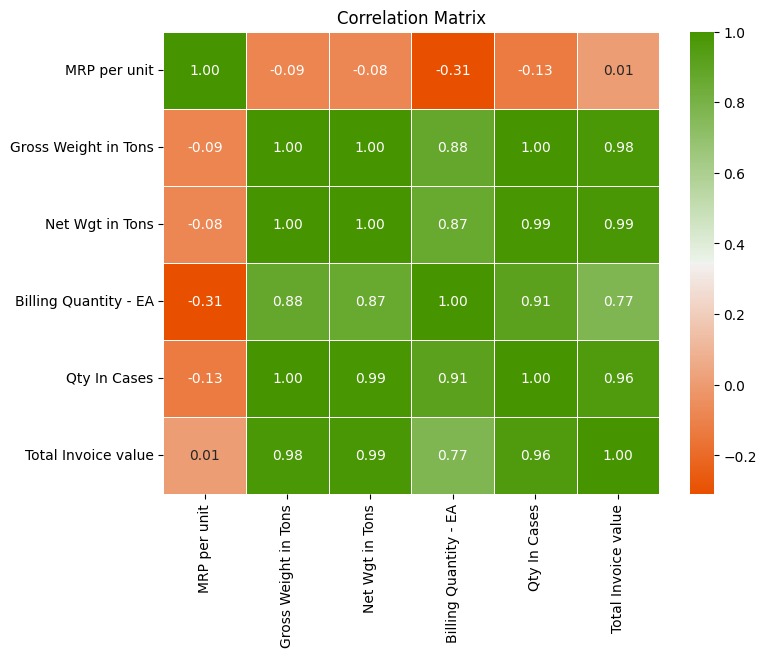

In [30]:
cmap = sns.diverging_palette(20, 120, l=55, s=100, as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

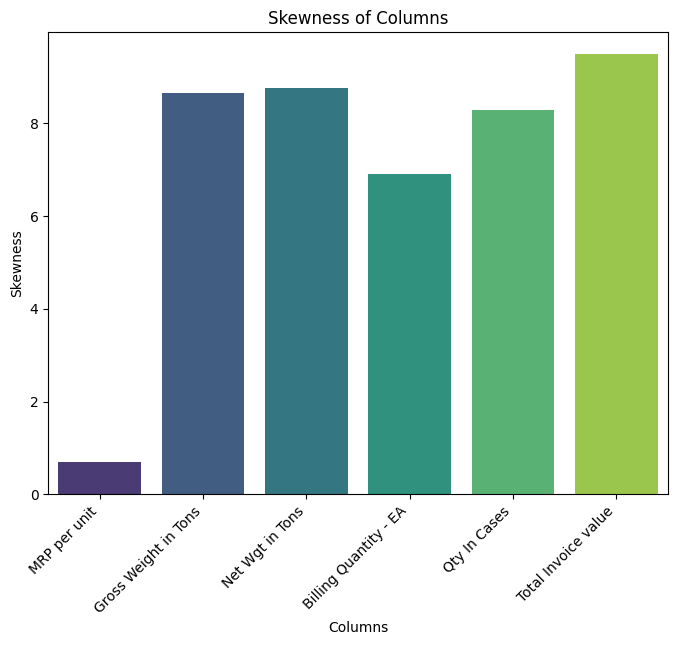

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette="viridis")
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.show()

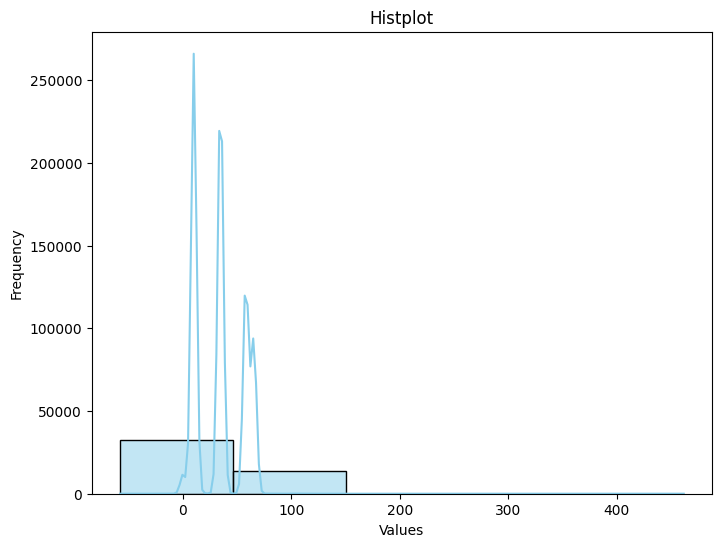

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MRP per unit'], bins=5, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histplot of MRP per unit')

plt.show()

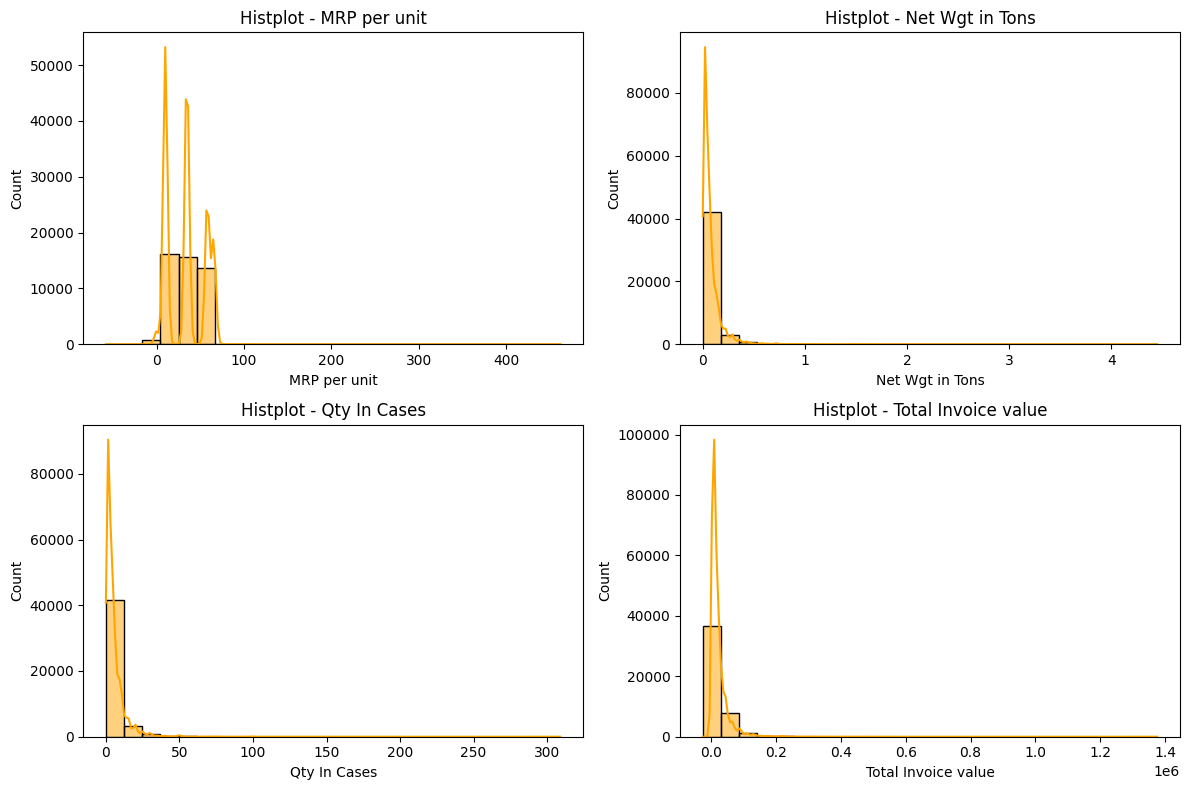

In [64]:

# Set up the subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histplot for each column
for i, column in enumerate(df[['MRP per unit','Net Wgt in Tons','Qty In Cases','Total Invoice value']].columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='orange', bins=25, edgecolor='black')
    axes[i].set_title(f'Histplot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

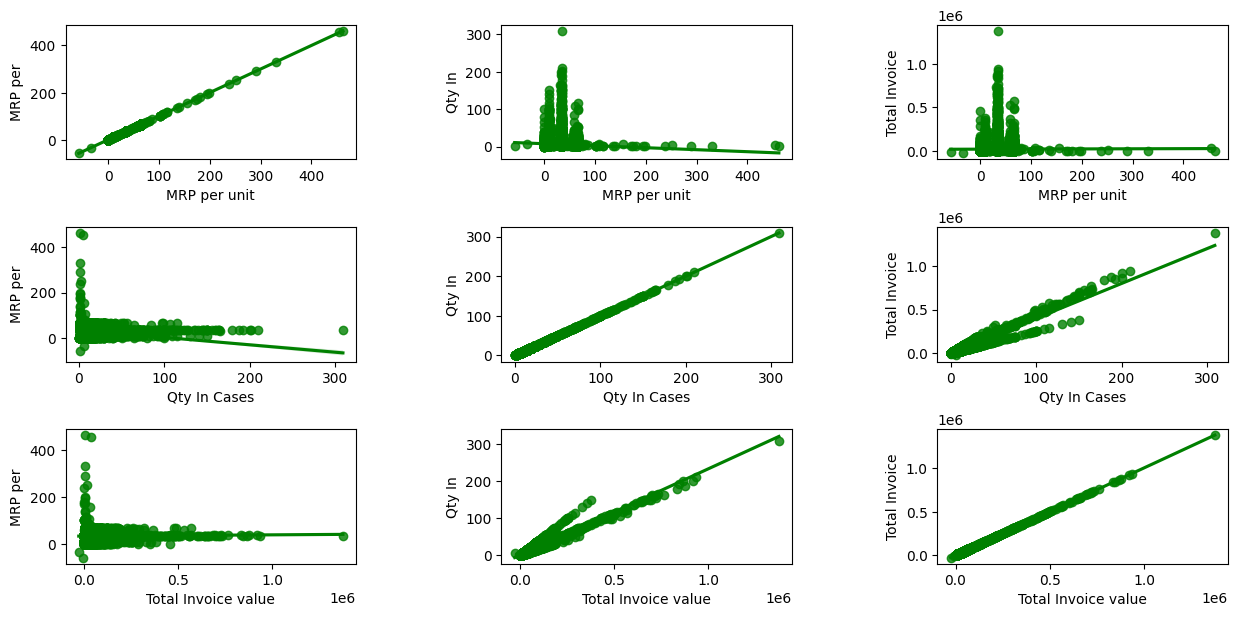

In [42]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['MRP per unit','Qty In Cases','Total Invoice value']:
    for y in ['MRP per unit','Qty In Cases','Total Invoice value']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df,color='green')
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

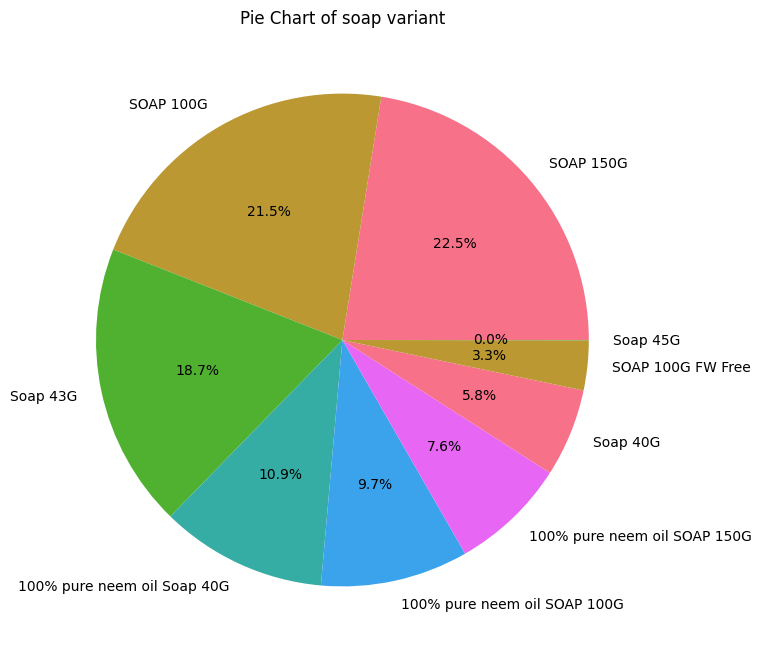

In [89]:
product_counts = df['Product'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index.map(lambda x: x.split(' ', 1)[1]), autopct='%1.1f%%', colors=sns.color_palette('husl'))
plt.title('Pie Chart of soap variant')

plt.show()

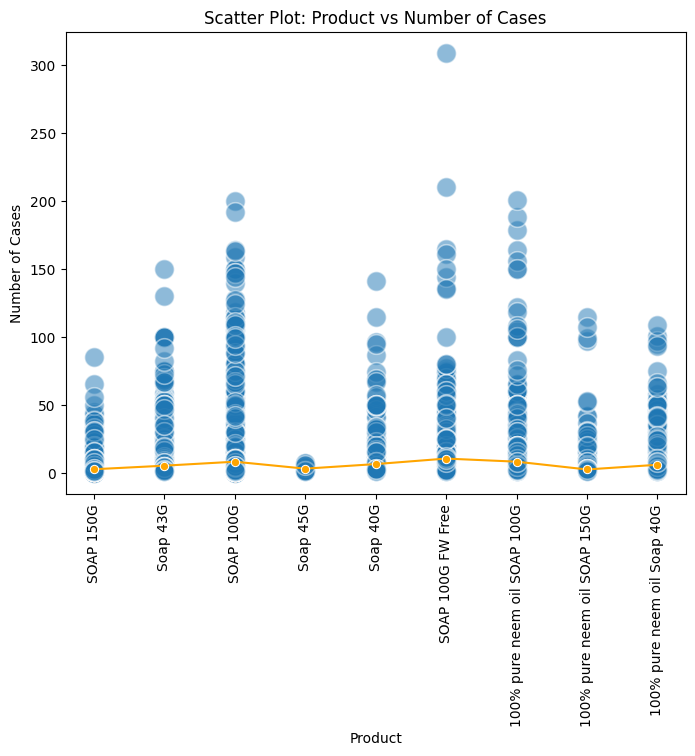

In [93]:
average_qty = df.groupby('Product')['Qty In Cases'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Product', y='Qty In Cases', data=df, s=200, alpha=0.5)
sns.lineplot(x='Product', y='Qty In Cases', data=average_qty, color='orange', marker='o')

plt.xticks(rotation=90)

masked_labels = average_qty['Product'].map(lambda x: x.split(' ', 1)[1])

plt.xlabel('Product')
plt.ylabel('Number of Cases')
plt.xticks(ticks=average_qty['Product'], labels=masked_labels)
plt.title('Scatter Plot: Product vs Number of Cases')

plt.show()

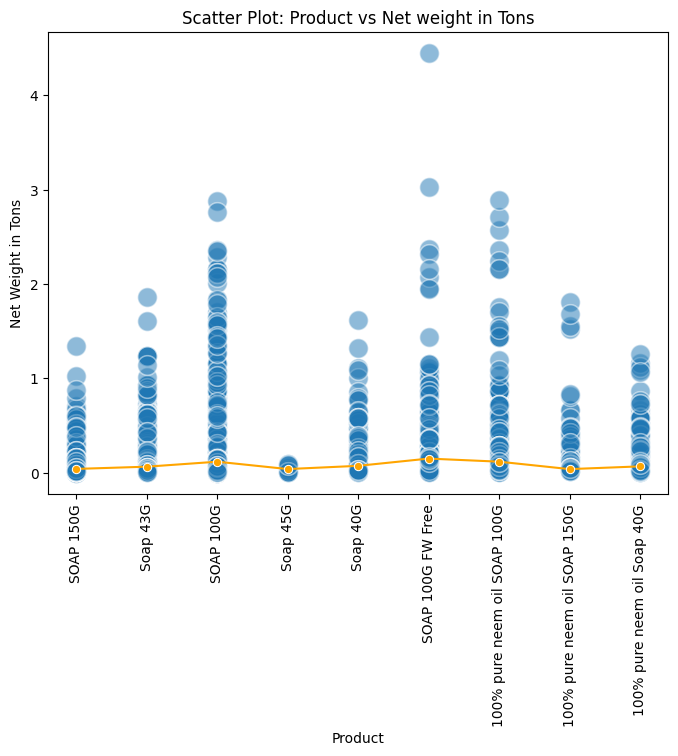

In [94]:
average_qty = df.groupby('Product')['Net Wgt in Tons'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Product', y='Net Wgt in Tons', data=df, s=200, alpha=0.5)
sns.lineplot(x='Product', y='Net Wgt in Tons', data=average_qty, color='orange', marker='o')

plt.xticks(rotation=90)

masked_labels = average_qty['Product'].map(lambda x: x.split(' ', 1)[1])

plt.xlabel('Product')
plt.ylabel('Net Weight in Tons')
plt.xticks(ticks=average_qty['Product'], labels=masked_labels)
plt.title('Scatter Plot: Product vs Net weight in Tons')

plt.show()

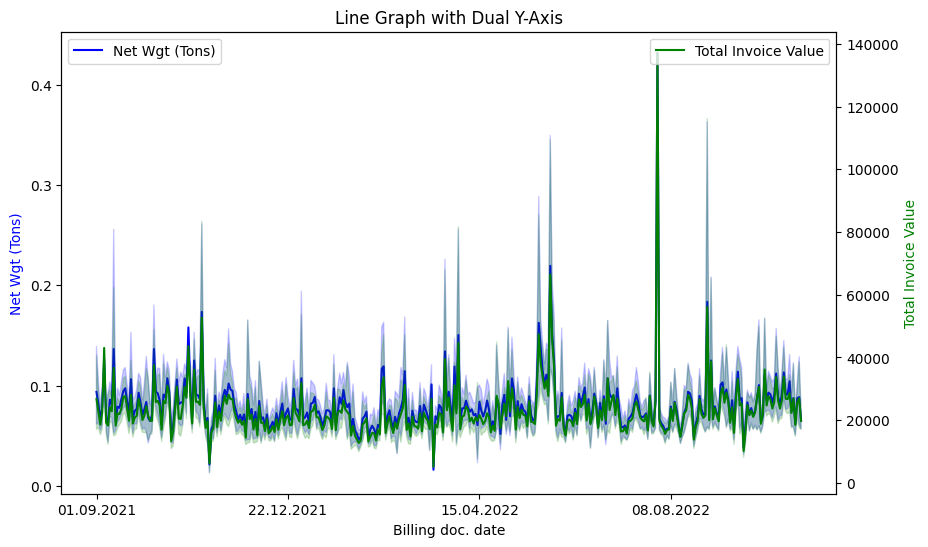

In [97]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Net Wgt in Tons on the left y-axis
sns.lineplot(x='Billing doc. date', y='Net Wgt in Tons', data=df, ax=ax1, color='blue', label='Net Wgt (Tons)')
ax1.set_ylabel('Net Wgt (Tons)', color='blue')

# Create a secondary y-axis for Total Invoice Value on the right
ax2 = ax1.twinx()
sns.lineplot(x='Billing doc. date', y='Total Invoice value', data=df, ax=ax2, color='green', label='Total Invoice Value')
ax2.set_ylabel('Total Invoice Value', color='green')

# Set x-axis markings once every 50 days
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

# Set title and legend
plt.title('Line Graph with Dual Y-Axis')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

C:\Users\Aadhith\AppData\Local\Temp\ipykernel_18896\1964252547.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Billing doc. date', y='Qty In Cases', data=product_data, label=f'{masked_product_name}', palette=[palette[i]])
C:\Users\Aadhith\AppData\Local\Temp\ipykernel_18896\1964252547.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Billing doc. date', y='Qty In Cases', data=product_data, label=f'{masked_product_name}', palette=[palette[i]])
C:\Users\Aadhith\AppData\Local\Temp\ipykernel_18896\1964252547.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Billing doc. date', y='Qty In Cases', data=product_data, label=f'{masked_product_name}', palette=[palette[i]])
C:\Users\Aadhith\AppData\Local\Temp\ipykernel_18896\1964252547.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Billing doc

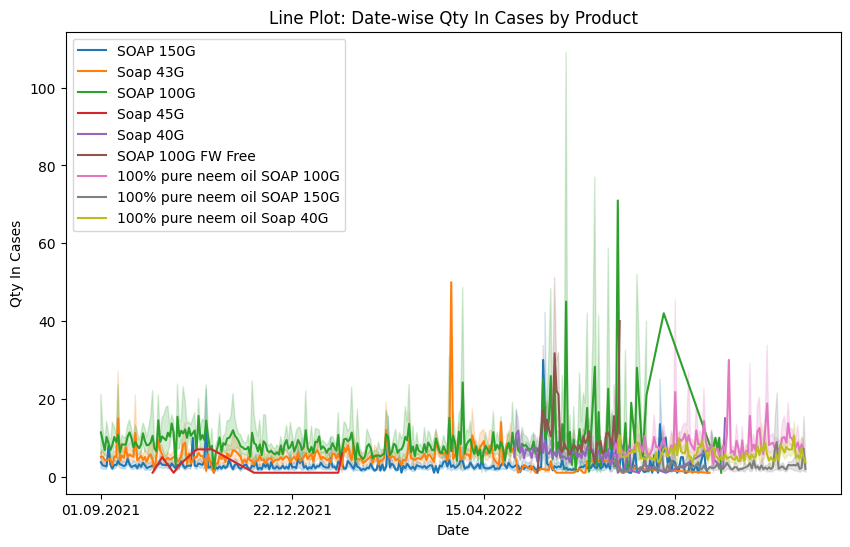

In [103]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('husl', n_colors=df['Product'].nunique())

for i, product in enumerate(df['Product'].unique()):
    product_data = df[df['Product'] == product]
    masked_product_name = product.split(' ', 1)[1]
    sns.lineplot(x='Billing doc. date', y='Qty In Cases', data=product_data, label=f'{masked_product_name}', palette=[palette[i]])

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('Date')
plt.ylabel('Qty In Cases')
plt.title('Line Plot: Date-wise Qty In Cases by Product')
plt.legend()

plt.show()